In [1]:
import sys

sys.path.append('..')

import networkx as nx
import matplotlib.pyplot as plt
from functions import *
from MH_functions import *

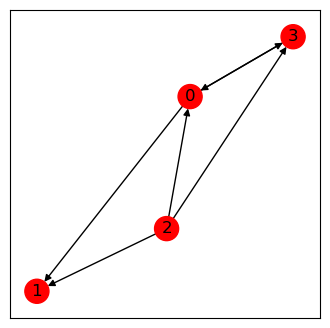

In [2]:
neurons = np.arange(4)
latent_nodes = []
observed_nodes = [0,1,2,3]
G = nx.DiGraph()
G.add_nodes_from(neurons)
G.add_edges_from([(0,1),(2,1),(3,0),(0,3),(2,3),(2,0)])
node_color = ['red' if node not in latent_nodes else 'grey' for node in neurons]
plt.figure(figsize=(4,4))
nx.draw_networkx(G, node_color=node_color)
plt.show()

In [3]:
mag = get_mag_from_dag(G, observed_nodes)
mag[(3, 0)] = '<->'
mag[(0, 3)] = '<->'
print(mag)
pag = mag.copy()

pag[(0, 1)] = '-->'
pag[(2, 0)] = 'o->'
pag[(3, 0)] = '<->'
pag[(0, 3)] = '<->'
pag[(2, 3)] = 'o->'

print(pag)

{(0, 1): '-->', (2, 0): '-->', (0, 3): '<->', (3, 0): '<->', (2, 1): '-->', (2, 3): '-->'}
{(0, 1): '-->', (2, 0): 'o->', (0, 3): '<->', (3, 0): '<->', (2, 1): '-->', (2, 3): 'o->'}


In [4]:
A = pag_adjacency_matrix(mag, len(observed_nodes))
get_consistent_MAGs(A)
#print(A)

[array([[0., 2., 2., 2.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [2., 0., 3., 0.]]),
 array([[0., 2., 3., 2.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [2., 0., 2., 0.]]),
 array([[0., 2., 3., 2.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [3., 0., 3., 0.]]),
 array([[0., 2., 3., 3.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [2., 0., 3., 0.]])]

In [5]:
P = pag_adjacency_matrix(pag, len(observed_nodes))

In [11]:
select_intervention_node(P, 10, 1500)

Collected 189 samples consistent with the PAG.
[2 2]
[1.9884664657804971, 1.9884664657804971]


2

In [7]:
res

[array([[0., 2., 2., 3.],
        [3., 0., 3., 0.],
        [2., 2., 0., 3.],
        [2., 0., 2., 0.]]),
 array([[0., 2., 2., 3.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [2., 0., 2., 0.]]),
 array([[0., 2., 2., 2.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [3., 0., 2., 0.]]),
 array([[0., 2., 2., 2.],
        [2., 0., 3., 0.],
        [2., 2., 0., 2.],
        [3., 0., 2., 0.]]),
 array([[0., 2., 2., 2.],
        [2., 0., 3., 0.],
        [2., 2., 0., 2.],
        [3., 0., 2., 0.]]),
 array([[0., 2., 2., 2.],
        [2., 0., 3., 0.],
        [2., 2., 0., 2.],
        [3., 0., 2., 0.]]),
 array([[0., 2., 2., 2.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [3., 0., 2., 0.]]),
 array([[0., 2., 2., 2.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [2., 0., 2., 0.]]),
 array([[0., 2., 2., 2.],
        [3., 0., 3., 0.],
        [2., 2., 0., 2.],
        [2., 0., 3., 0.]]),
 array([[0., 2., 2., 2.],
        [3., 0., 3.,

In [32]:
summary_graph = nx.DiGraph()
summary_graph.add_nodes_from(np.arange(6))
summary_graph.add_edges_from([(0, 1), (0, 2), (1,3),(3,4),(0,4),(5,4),(5,0)])
n_timelags = 2
num_nodes = summary_graph.number_of_nodes()
full_dag, pos, with_time_label = create_fulltime_graph(summary_graph, n_timelags=n_timelags)
observed_nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
node_color = ['red' if node in observed_nodes else 'grey' for node in full_dag.nodes()]

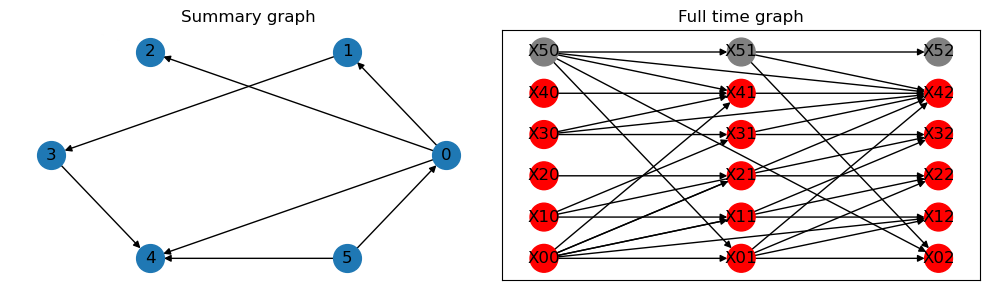

In [33]:
# visualisation of one of the networks generated
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
nx.draw_circular(summary_graph, arrows=True, ax=ax[0], with_labels=True, node_size=400, alpha=1)
ax[0].set_title("Summary graph")
nx.draw_networkx(full_dag, pos=pos, labels=with_time_label, node_size=400, node_color=node_color,ax=ax[1])
ax[1].set_title("Full time graph")
plt.tight_layout()
plt.show()

In [36]:
mag = get_mag_from_dag(full_dag=full_dag, observed_nodes=observed_nodes)
A = pag_adjacency_matrix(mag, len(observed_nodes))
#get_consistent_MAGs(A)
# make into pag
#mag[(1,2)] = '-->'
#mag[(3,1)] = 'o->'
#mag[(3,2)] = 'o->'
#mag[(0,1)] = 'o->'
#print(mag)

In [10]:
ls=[1,2,3,4]

In [12]:
ls[-3:]

[2, 3, 4]